In [176]:
import pandas as pd

df = pd.read_csv('the_office_transcript.csv', index_col=0)
df.head()

,season,episode,scene,line,character
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael


In [177]:
import string
from string import punctuation
import re
import contractions

def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(f'[{re.escape(punctuation)}]', '', text)
    return text

In [178]:
df['line_preprocessed'] = df['line'].apply(lambda x: preprocess_text(x))
df

,season,episode,scene,line,character,line_preprocessed
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,all right jim your quarterlies look very good...
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,oh i told you i could not close it so
2,1,1,1,So you've come to the master for guidance? Is ...,Michael,so you have come to the master for guidance i...
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,actually you called me in here but yeah
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,all right well let me show you how it is done
...,...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,it all seems so very arbitrary i applied for ...
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith,i just feel lucky that i got a chance to share...
59906,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis,i m happy that this was all filmed so i can ...
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim,i sold paper at this company for years my ...


In [179]:
from textblob import TextBlob

def get_sentiment_score(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    return sentiment_score

In [180]:
df['sentiment'] = df['line'].apply(get_sentiment_score)

In [181]:
df[df['sentiment'] < -0.8]

,season,episode,scene,line,character,line_preprocessed,sentiment
17,1,1,6,My job is to speak to clients on the phone abo...,Jim,my job is to speak to clients on the phone abo...,-1.000000
61,1,1,11,"Oh, my God! Oh! That's... horrifying. Horrible...",Michael,oh my god oh that is horrifying horribl...,-0.966667
644,1,3,14,This is a ridiculously awful plan. Because you...,Pam,this is a ridiculously awful plan because you...,-1.000000
674,1,3,17,You let him walk all over you. It's just pathe...,Angela,you let him walk all over you it is just path...,-1.000000
799,1,3,35,Why did you put Dwight in charge of that? He d...,Pam,why did you put dwight in charge of that he d...,-1.000000
...,...,...,...,...,...,...,...
58682,9,21,33,"Will you tell me bluntly, do you think I am ma...",Andy,will you tell me bluntly do you think i am ma...,-1.000000
58788,9,21,42,"Oh, don���t look at me cause I think you���re ...",Jim,oh don t look at me because i think you r...,-1.000000
58973,9,22,25,Do you want to see a video of a weatherman who...,Kevin,do you want to see a video of a weatherman who...,-1.000000
59169,9,22,45,"Oh, you know my name. Well, that is shocking. ...",Kevin,oh you know my name well that is shocking,-1.000000


In [182]:
df[(df['character'] == 'Michael') & (df['season'] == 9)]['line_preprocessed']

59750                              that   s what she said 
59797     i feel like all my kids grew up and then they...
Name: line_preprocessed, dtype: object

In [183]:
top_characters = list(df['character'].value_counts()[:9].sort_values(ascending=False).index)

In [184]:
mean_sentiment_for_character = df.groupby('character')['sentiment'].mean()

In [185]:
mean_sentiment_for_top_characters = {}

for character in top_characters:
    mean_sentiment_for_top_characters[character] = mean_sentiment_for_character[character]

In [186]:
sentiment_for_character_df = pd.DataFrame(list(mean_sentiment_for_top_characters.items()), columns=['Character', 'Sentiment'])
sentiment_for_character_df = sentiment_for_character_df.sort_values(by=['Sentiment'], ascending=False)
sentiment_for_character_df

,Character,Sentiment
0,Michael,0.102265
2,Jim,0.097498
3,Pam,0.088851
1,Dwight,0.073417
4,Andy,0.072438
7,Erin,0.064096
8,Oscar,0.063713
5,Kevin,0.057516
6,Angela,0.036817


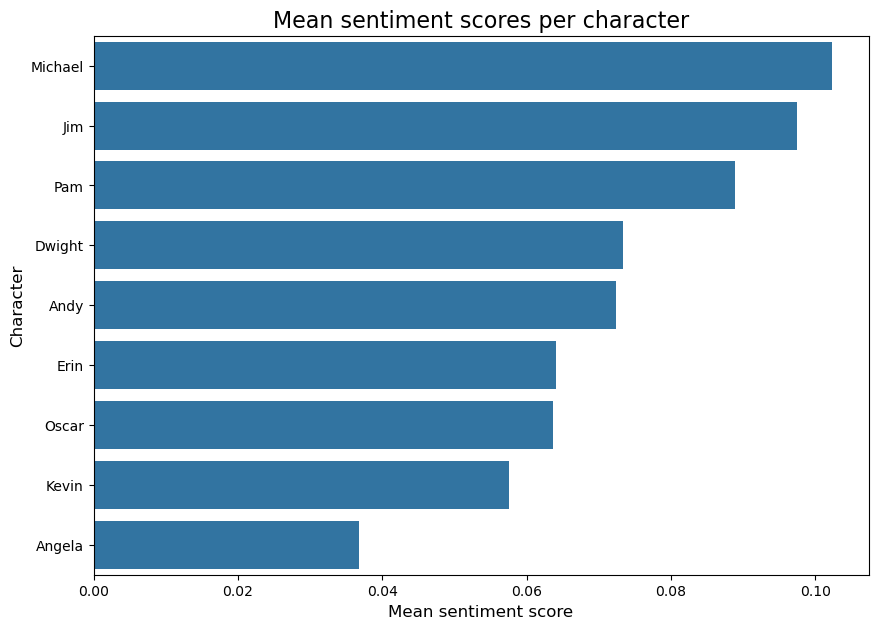

In [187]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.barplot(x='Sentiment', y='Character', data=sentiment_for_character_df)
plt.title('Mean sentiment scores per character', fontsize=16)
plt.xlabel('Mean sentiment score', fontsize=12)
plt.ylabel('Character', fontsize=12)
plt.show()

In [188]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

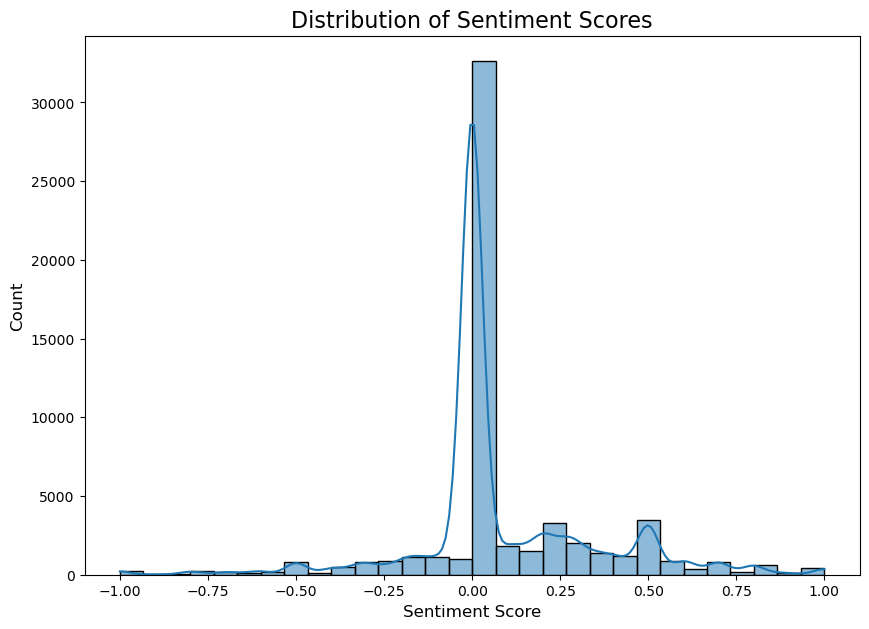

In [189]:
plt.figure(figsize=(10, 7))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

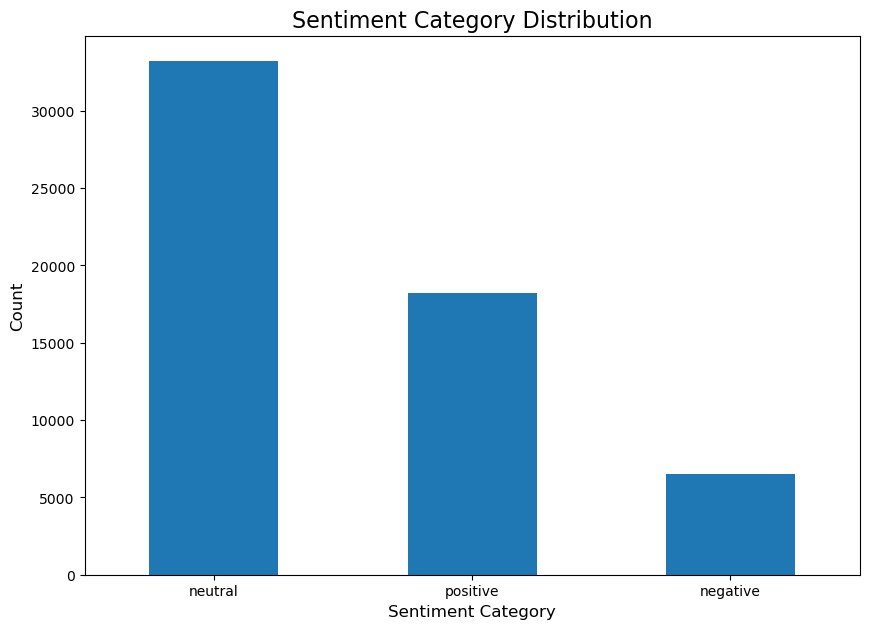

In [190]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)
sentiment_counts = df['sentiment_category'].value_counts()

plt.figure(figsize=(10, 7))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Category Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

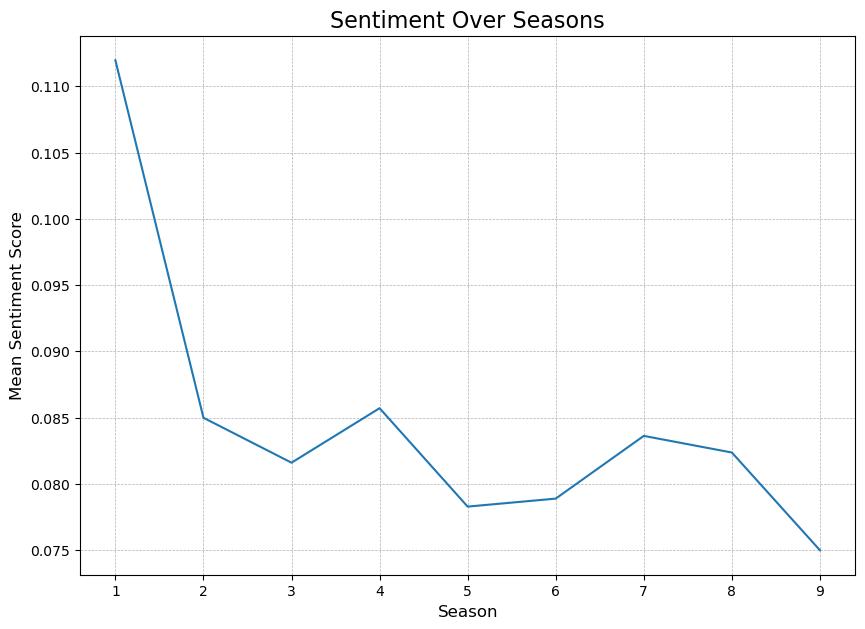

In [191]:
seasonal_sentiment = df.groupby('season')['sentiment'].mean()

plt.figure(figsize=(10, 7))
seasonal_sentiment.plot()
plt.title('Sentiment Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.xticks(range(1, len(seasonal_sentiment)+1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [192]:
mean_sentiment_per_season = df.groupby(['character', 'season']).sentiment.mean().reset_index()
mean_sentiment_per_season

,character,season,sentiment
0,(Pam's mom) Heleen,6,0.000000
1,3rd Athlead Employee,9,0.000000
2,4th Athlead Employee,9,0.300000
3,A.J.,5,0.110417
4,AJ,5,0.054384
...,...,...,...
1169,[Clark and Pete are shown on screen]\nVideo An...,9,0.000000
1170,[repeats]\nAndy: Fail,9,0.000000
1171,abe,7,0.000000
1172,sAndy,4,0.625000


In [193]:
threshold = 5  
quote_counts = df.groupby(['character', 'season']).size()

to_remove = quote_counts[quote_counts < threshold].reset_index()
df = df.reset_index(drop=True)

for index, row in to_remove.iterrows():
    df = df[~((df['character'] == row['character']) & (df['season'] == row['season']))]

In [194]:
mean_sentiment_per_season = df.groupby(['character', 'season']).sentiment.mean().reset_index()
mean_sentiment_per_season

,character,season,sentiment
0,A.J.,5,0.110417
1,AJ,5,0.054384
2,AJ,7,0.176250
3,Abby,2,0.037500
4,Ad guy 1,4,0.198611
...,...,...,...
472,Wendy's phone operator,4,0.040000
473,Wolf,9,0.039426
474,Woman,4,0.140000
475,Worker,1,-0.222679


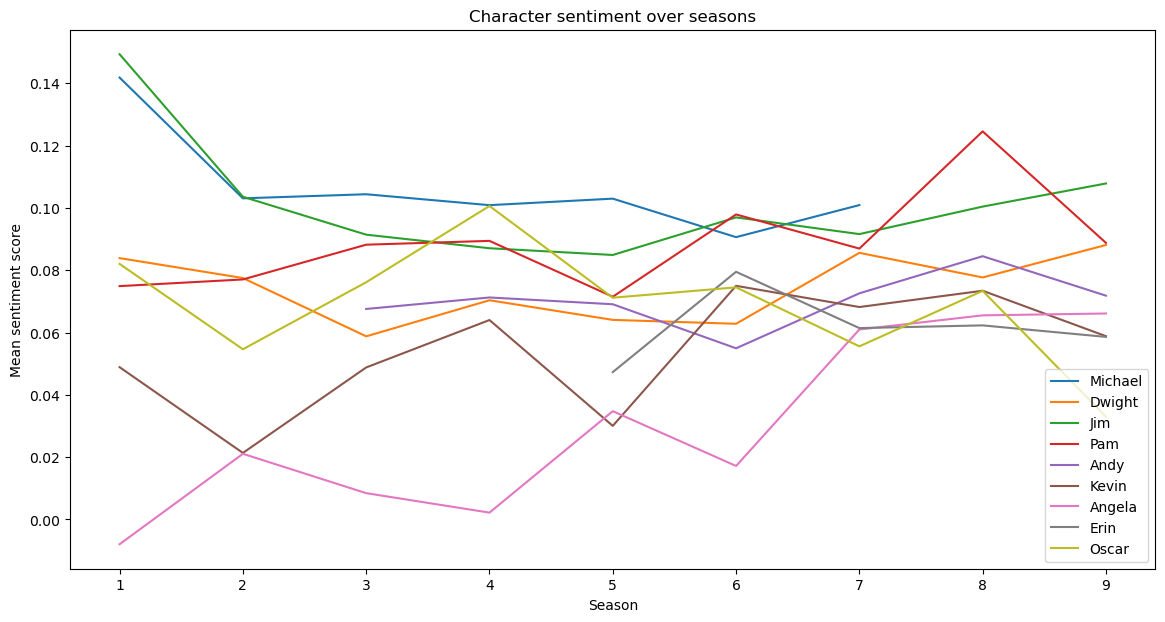

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

for character in top_characters:
    subset = mean_sentiment_per_season[mean_sentiment_per_season['character'] == character]
    plt.plot(subset['season'], subset['sentiment'], label=character)

plt.legend()
plt.title("Character sentiment over seasons")
plt.xlabel("Season")
plt.ylabel("Mean sentiment score")
plt.show()

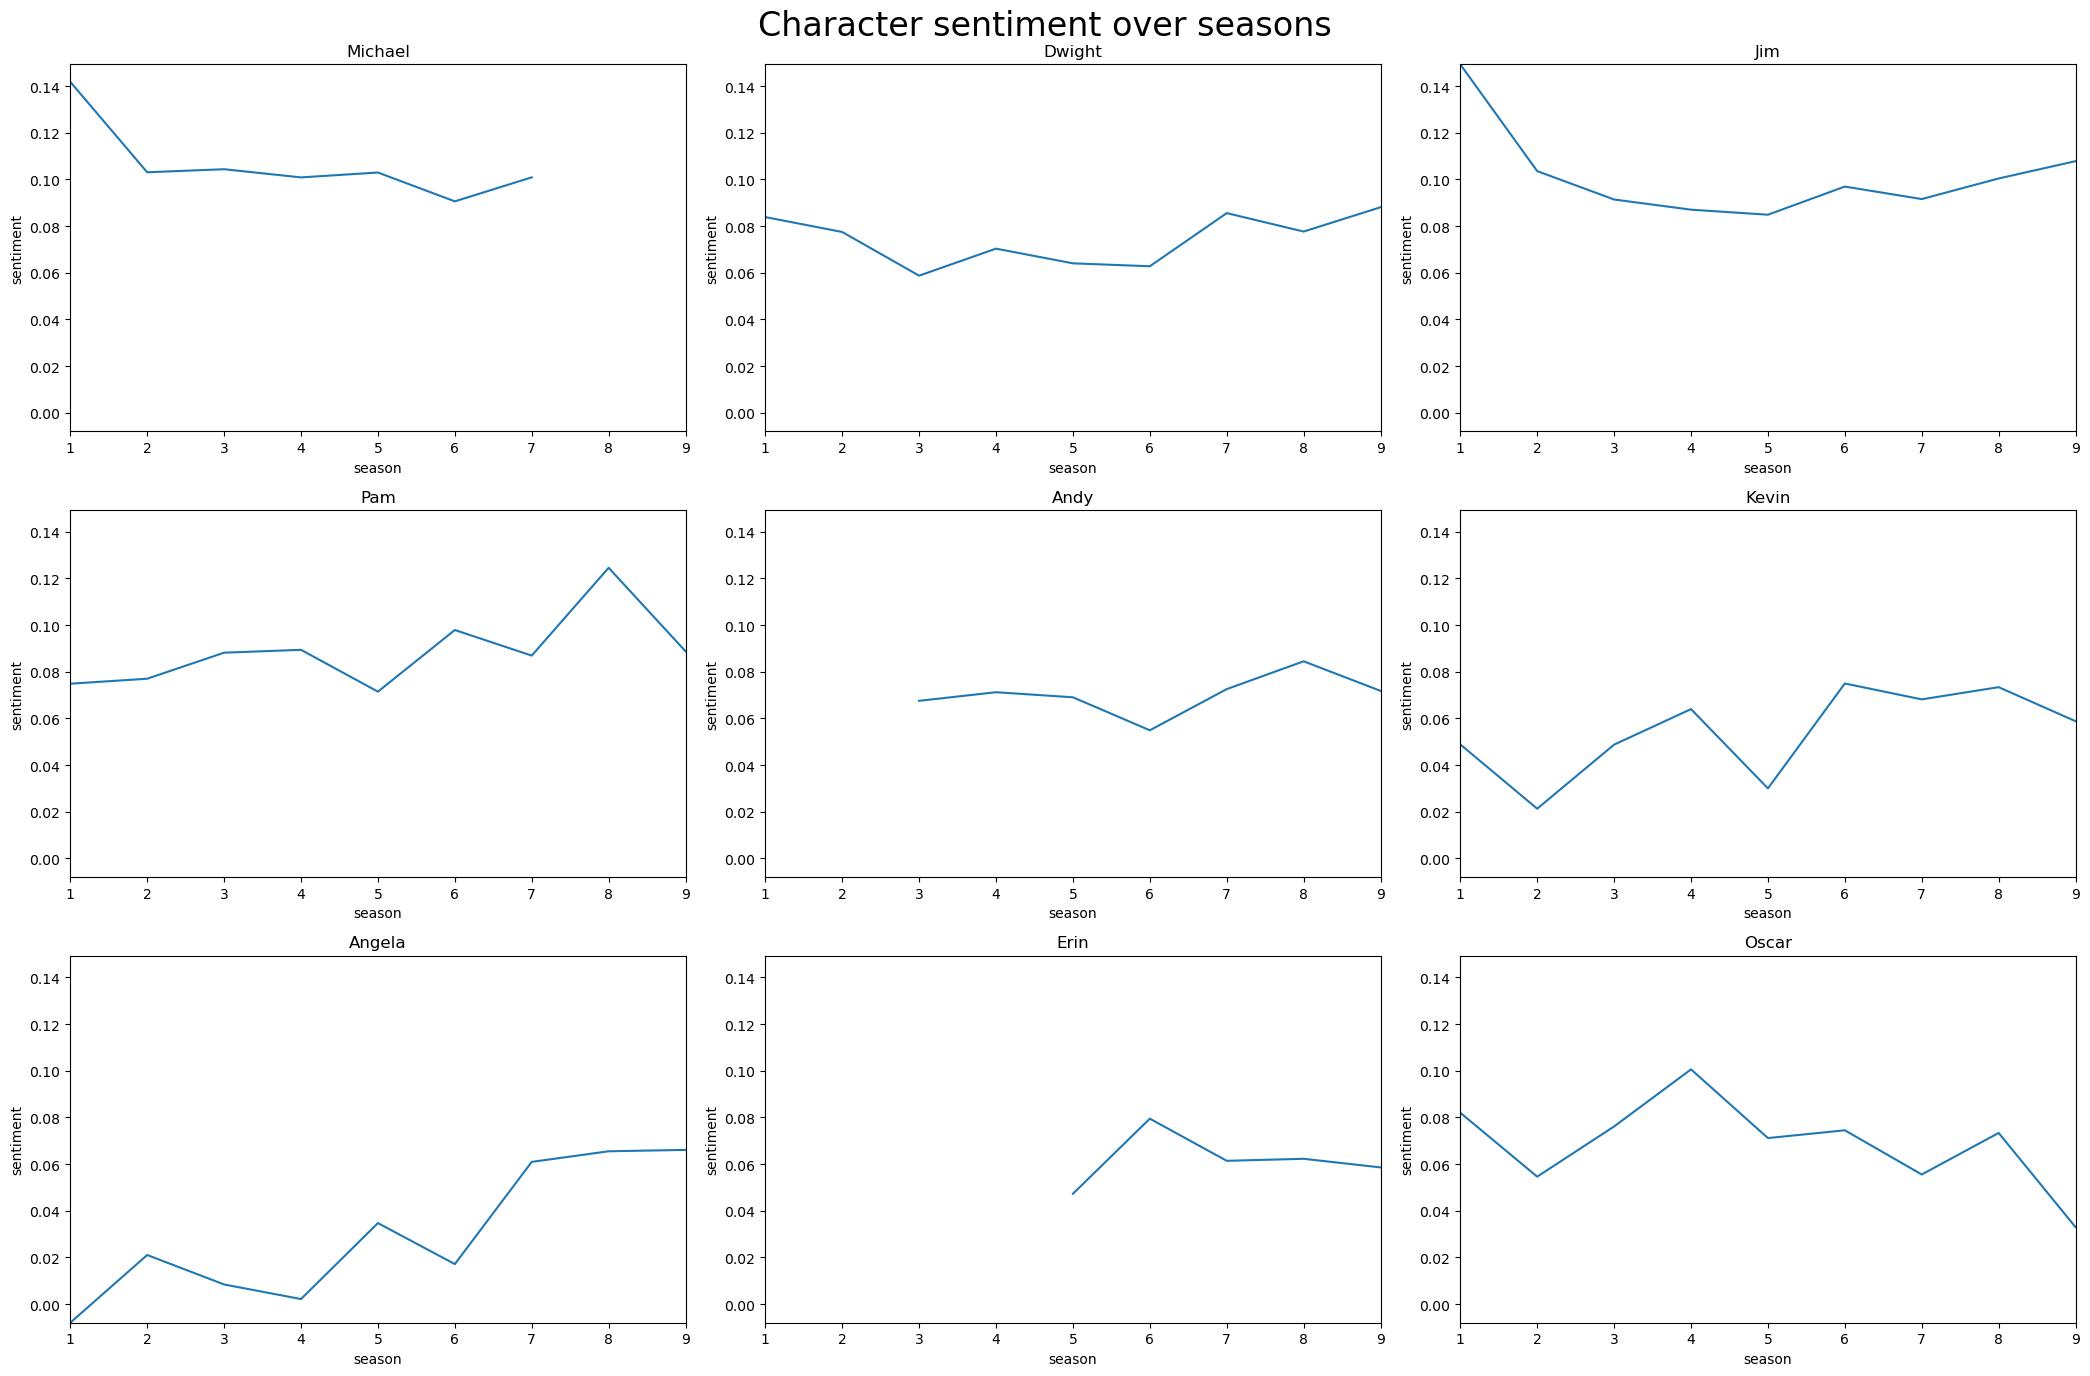

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = mean_sentiment_per_season[mean_sentiment_per_season['character'].isin(top_characters)]

global_min = filtered_df['sentiment'].min()
global_max = filtered_df['sentiment'].max()

fig, ax = plt.subplots(3, 3, figsize=(21, 14))
index = 1
for character in top_characters:
    ax = plt.subplot(3, 3, index)
    data_character = mean_sentiment_per_season[mean_sentiment_per_season['character'] == character]
    sns.lineplot(x='season', y='sentiment', data=data_character, ax=ax)
    plt.ylim(global_min, global_max)
    ax.set_title(character)
    ax.set_xlim(1, 9)
    index += 1

plt.suptitle('Character sentiment over seasons', fontsize=24)
fig.tight_layout()
plt.show()